In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
df = pd.read_csv("diabetes.csv")

In [51]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


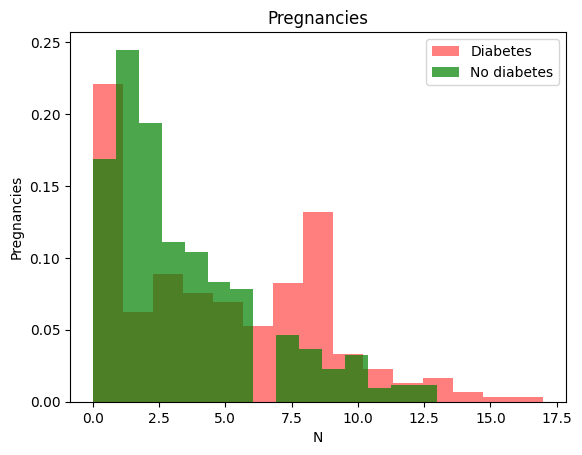

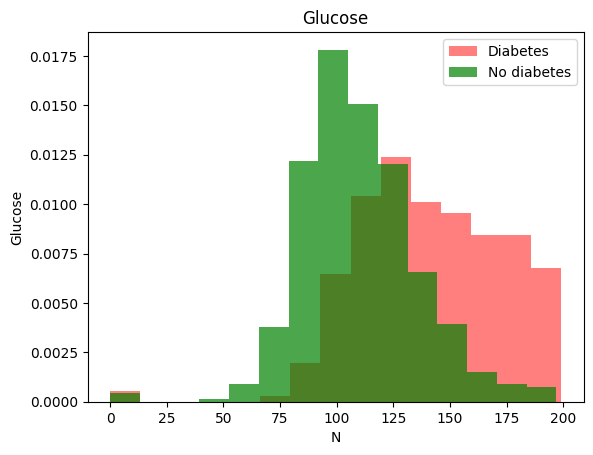

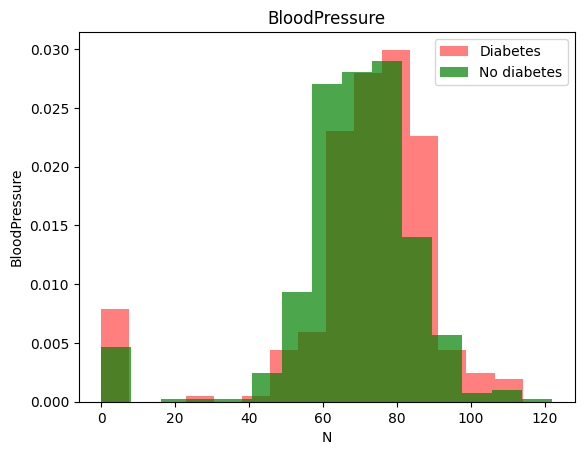

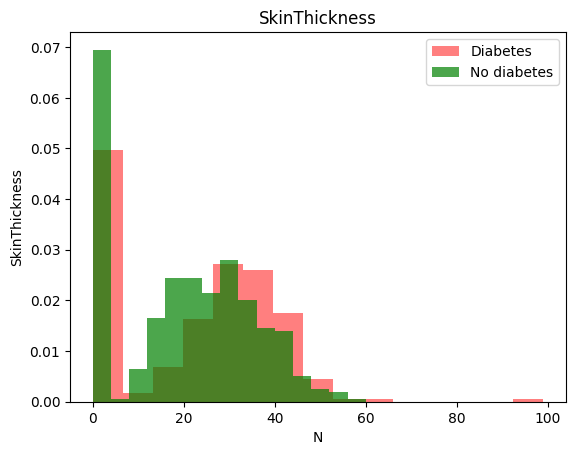

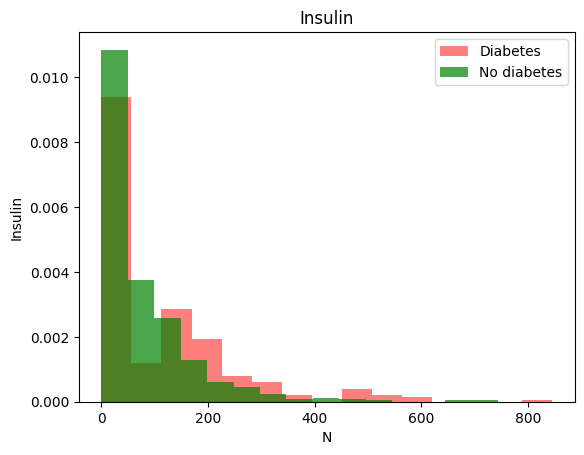

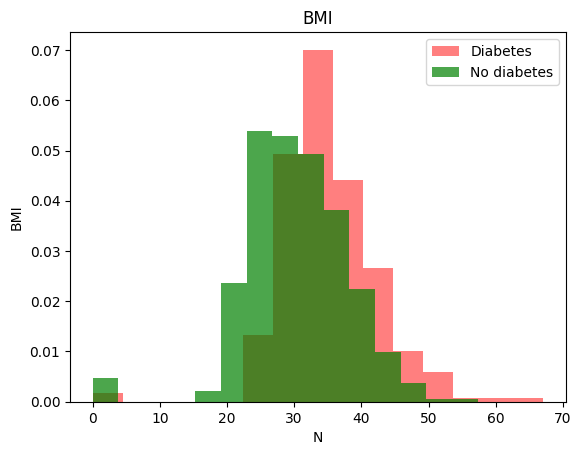

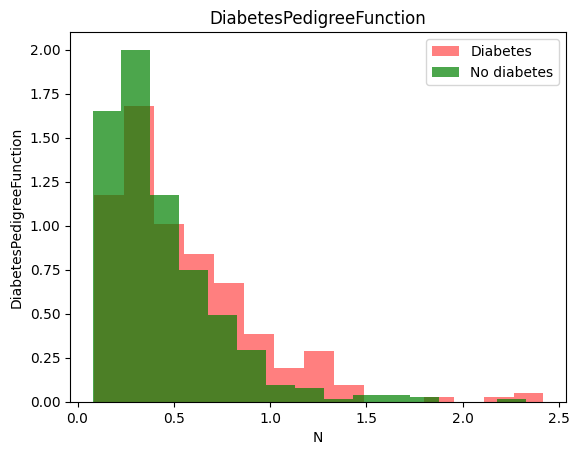

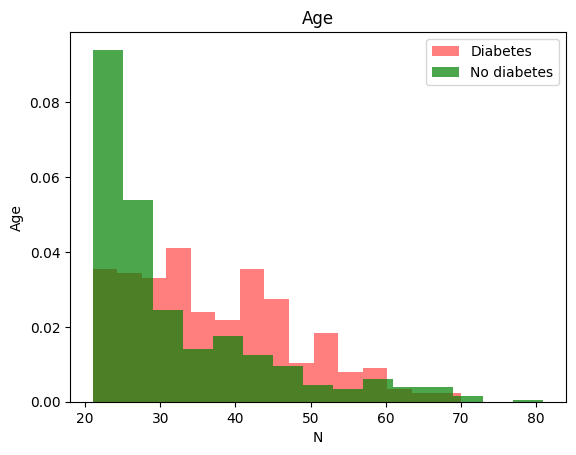

In [52]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label], color="red", label = "Diabetes", alpha = 0.5, density = True, bins = 15)
    plt.hist(df[df['Outcome']==0][label], color= "green", label = "No diabetes", alpha = 0.7, density = True, bins = 15)
    plt.title(label)
    plt.xlabel("N")
    plt.ylabel(label)
    plt.legend()
    plt.show()

In [53]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [54]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x,np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data, columns = df.columns)

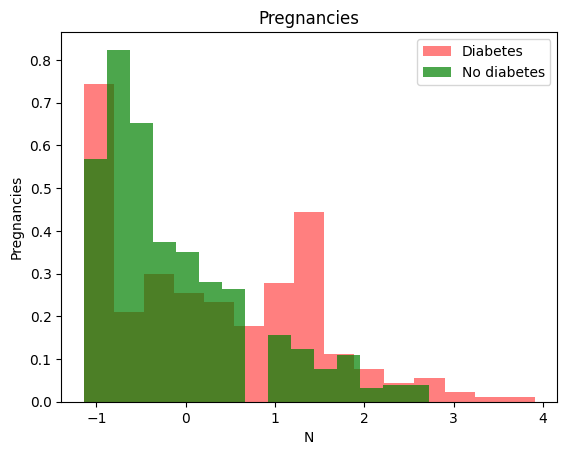

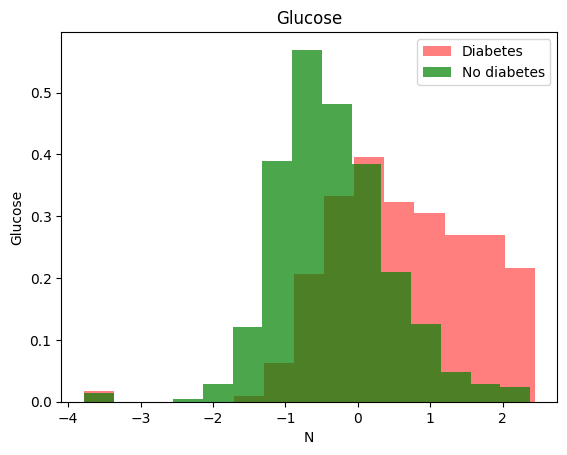

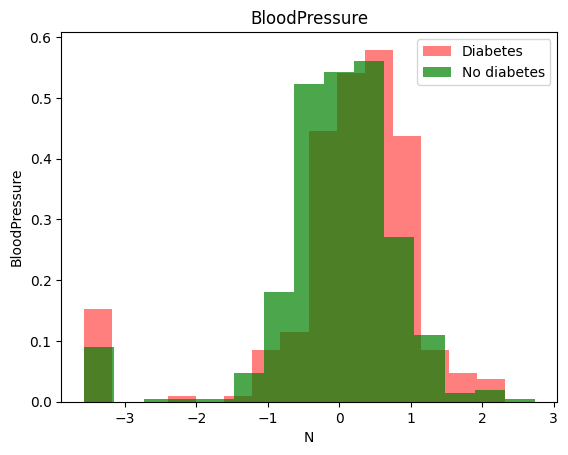

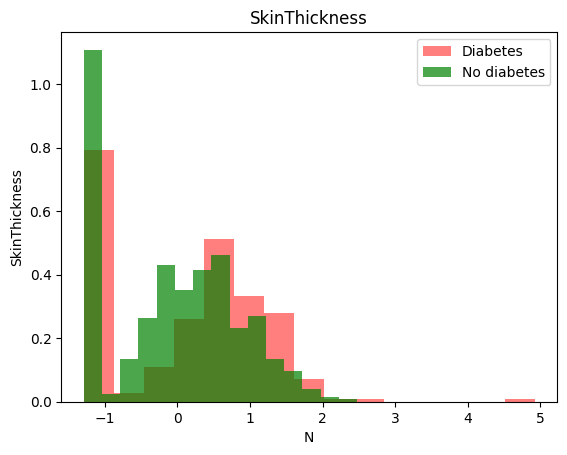

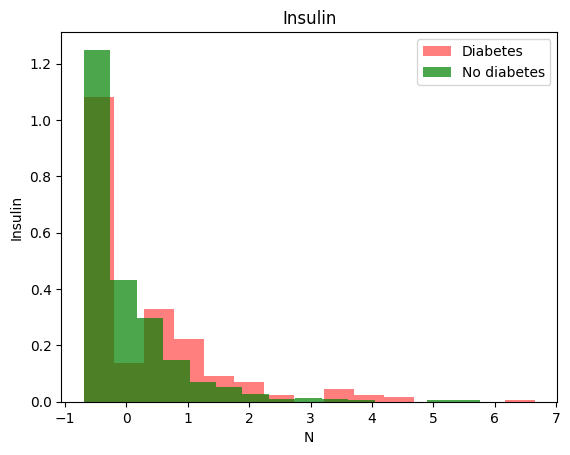

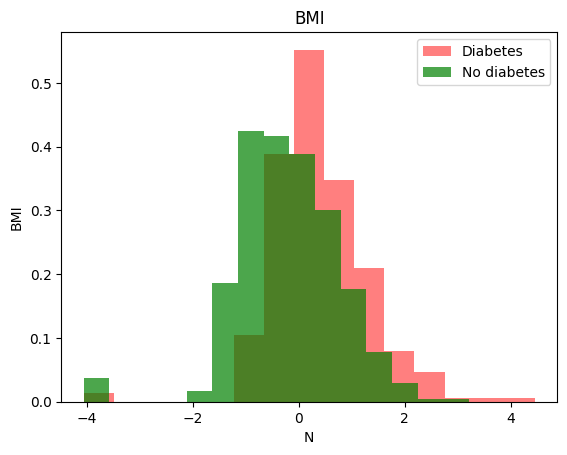

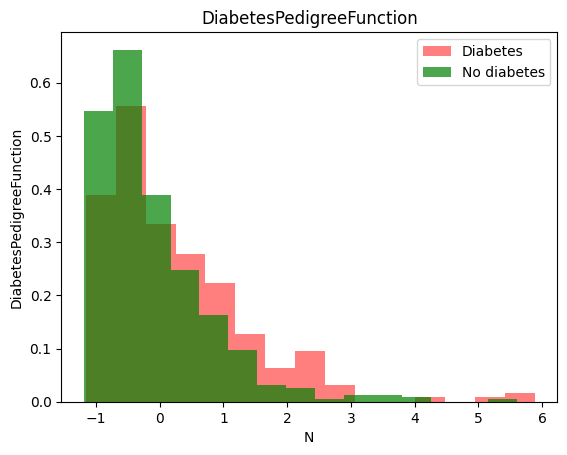

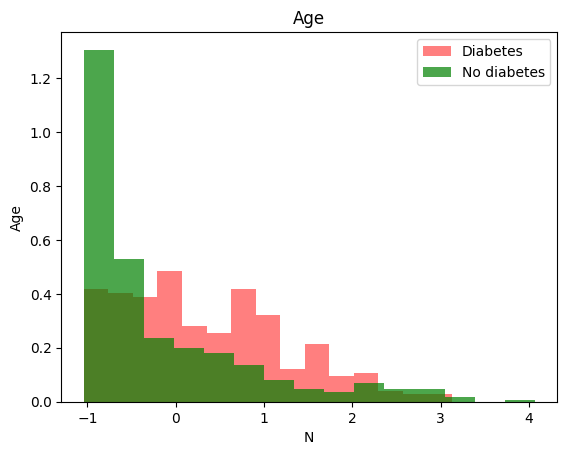

In [55]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(transformed_df[df['Outcome']==1][label], color="red", label = "Diabetes", alpha = 0.5, density = True, bins = 15)
    plt.hist(transformed_df[df['Outcome']==0][label], color= "green", label = "No diabetes", alpha = 0.7, density = True, bins = 15)
    plt.title(label)
    plt.xlabel("N")
    plt.ylabel(label)
    plt.legend()
    plt.show()

In [56]:
X_train, X_temp, Y_train, Y_temp = train_test_split(x,y,test_size=0.2, random_state=0)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp,Y_temp,test_size=0.2, random_state=0)

In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

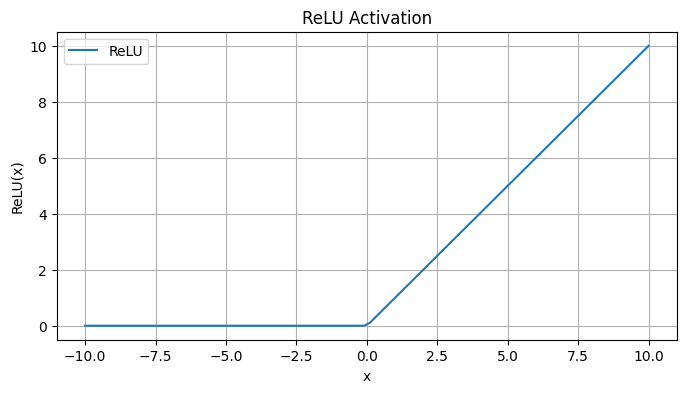

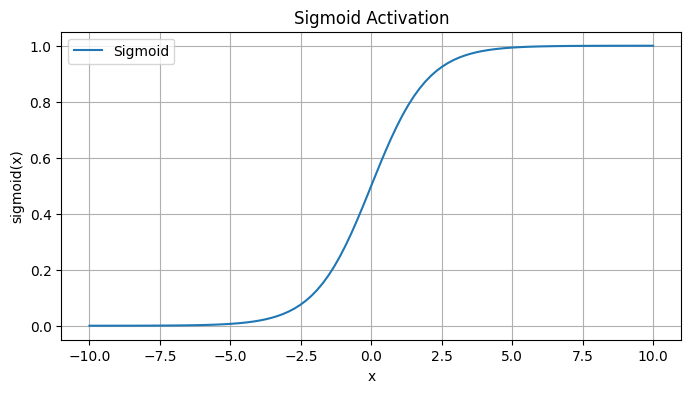

In [58]:
from utils import plot_relu, plot_sigmoid

plot_relu()
plot_sigmoid()

In [59]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [60]:
model.evaluate(X_train, Y_train)

20/20 [==============================] - 0s 2ms/step - loss: 0.9267 - accuracy: 0.3550


[0.926746666431427, 0.35504886507987976]

In [61]:
model.evaluate(X_valid, Y_valid)

4/4 [==============================] - 0s 6ms/step - loss: 0.9513 - accuracy: 0.3252


[0.9512823820114136, 0.3252032399177551]

In [62]:
model.fit(X_train, Y_train, batch_size=16, epochs=50, validation_data=(X_valid,Y_valid))

Epoch 1/50
39/39 [==============================] - 2s 7ms/step - loss: 0.8054 - accuracy: 0.3779 - val_loss: 0.7186 - val_accuracy: 0.4309
Epoch 2/50
39/39 [==============================] - 0s 4ms/step - loss: 0.6586 - accuracy: 0.6352 - val_loss: 0.6256 - val_accuracy: 0.6667
Epoch 3/50
39/39 [==============================] - 0s 5ms/step - loss: 0.5853 - accuracy: 0.7410 - val_loss: 0.5640 - val_accuracy: 0.7398
Epoch 4/50
39/39 [==============================] - 0s 4ms/step - loss: 0.5388 - accuracy: 0.7476 - val_loss: 0.5271 - val_accuracy: 0.7805
Epoch 5/50
39/39 [==============================] - 0s 4ms/step - loss: 0.5069 - accuracy: 0.7524 - val_loss: 0.5038 - val_accuracy: 0.7805
Epoch 6/50
39/39 [==============================] - 0s 4ms/step - loss: 0.4902 - accuracy: 0.7573 - val_loss: 0.4916 - val_accuracy: 0.7967
Epoch 7/50
39/39 [==============================] - 0s 6ms/step - loss: 0.4802 - accuracy: 0.7622 - val_loss: 0.4839 - val_accuracy: 0.7967
Epoch 8/50
39/39 [==

In [63]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 138ms/step - loss: 0.3001 - accuracy: 0.9032


[0.3000551462173462, 0.9032257795333862]

In [64]:
input_data = np.array([[5, 120, 70, 30, 0, 35, 0.25, 40],
                       [10, 200, 90, 35, 320, 45, 0.6, 55]])

input_data = scaler.transform(input_data)
predictions = model.predict(input_data)

predictions

1/1 [==============================] - 0s 128ms/step


array([[0.39480057],
       [0.981836  ]], dtype=float32)

In [65]:
for pred in predictions:
    if pred >= 0.5:
        print("Diabetes Positive")
    else:
        print("Diabetes Negative")

Diabetes Negative
Diabetes Positive
